# Derivative of P(G_n) with respect to r:

The derivative of the integrand of P(G_n) with respect to r
compared with the analytic formula for the derivative:

In [62]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib notebook
from IPython.display import display, Math
import sympy
from sympy import *
from sympy.mpmath import *

# Initialize the session
init_session(quiet=True)

# Let's report what version of sympy this is
print("Using sympy version", sympy.__version__)

IPython console for SymPy 0.7.6.1 (Python 3.5.2-64-bit) (ground types: python)
Using sympy version 0.7.6.1


Define integrand of P(G_n):

In [67]:
# Define derivative of the the integrand of P(G_n):
pintegrand, dpdr, dpdb, dpdr2, dpdb2, dpdb_diff, dpdr_diff, r, b, n, x, m_n, m_nm2 = symbols('pintegrand dpdr dpdb dpdr2 dpdb2 dpdb_diff dpdr_diff r b n x m_n m_nm2')
pintegrand = 2*r*sqrt(1-(r-b)**2-4*b*r*sin(x)**2)**n*(r-b+2*b*sin(x)**2)
dpdr = diff(pintegrand,r)
dpdb = diff(pintegrand,b)

Simplify the result:

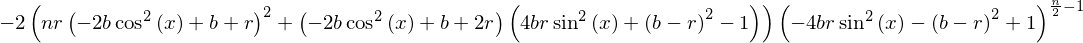

In [68]:
simplify(dpdr)

Now compute the right hand side:

In [69]:
m_n = sqrt(1-(r-b)**2-4*b*r*sin(x)**2)**n
m_nm2 = sqrt(1-(r-b)**2-4*b*r*sin(x)**2)**(n-2)
dpdr2 = 2*r*((n+2)*m_n-n*m_nm2)
dpdb2 = n/b*((r**2+b**2)*(m_n-m_nm2)+(r**2-b**2)**2*m_nm2)

Next, show that these are equal:

In [70]:
dpdr_diff = dpdr-dpdr2
dpdb_diff = dpdb-dpdb2

Simplify this expression:

In [72]:
quad(lambda x: dpdr_diff.subs({"n":2,"b":0.3,"r":0.5}),[-pi/2,pi/2])

TypeError: cannot create mpf from -pi/2

That's it for now!

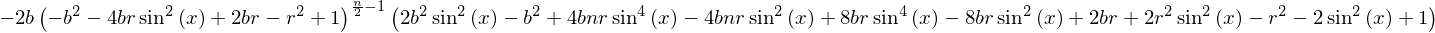

In [54]:
simplify(dpdr_diff)

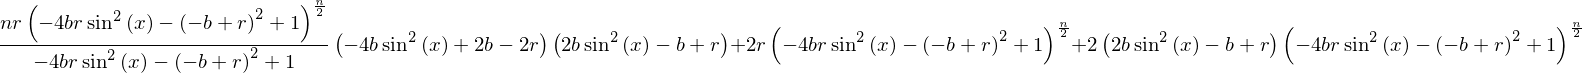

In [55]:
dpdr

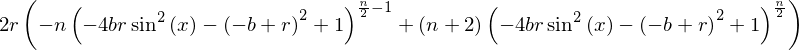

In [56]:
dpdr2

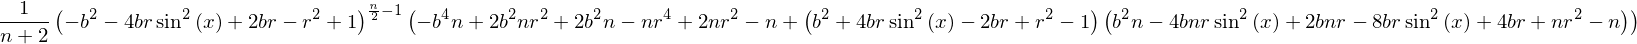

In [60]:
simplify(factor(pintegrand - (2*r**2*m_n-n/(n+2)*((1-r**2-b**2)*m_n+(1-(r-b)**2)*((r+b)**2-1)*m_nm2))))

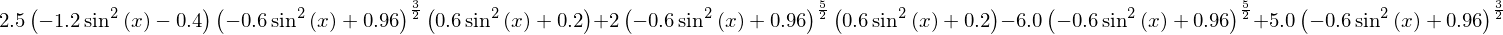

In [65]:
dpdr_diff.subs({"n":5,"b":0.3,"r":0.5})

In [66]:
(1-(0.3-0.5)**2)/(4*0.3*0.5)

In [73]:
dpdr_diff.subs({"n":2,"b":0.3,"r":0.5})

In [78]:
quad(lambda x: (−1.2*sin(x)**2−0.4)*(0.6*sin(x)**2+0.2)+2*(−0.6*sin(x)**2+0.96)*(0.6*sin(x)**2+0.2)+1.8*sin(x)**2−0.88,[-pi/2,pi/2])

SyntaxError: invalid character in identifier (<ipython-input-78-c197d2072a74>, line 1)

In [79]:
quad(lambda x: (-1.2*sin(x)**2-0.4)*(0.6*sin(x)**2+0.2)+2*(-0.6*sin(x)**2+0.96)*(0.6*sin(x)**2+0.2)+1.8*sin(x)**2-0.88,[-pi/2,pi/2])

TypeError: cannot create mpf from -pi/2